In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# !pip install nltk

In [3]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

Put the hyparameters at the top like this to make it easier to change and edit.

In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [145]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [146]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [147]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [148]:
word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'made': 24,
 'get': 25,
 'music': 26,
 'game': 27,
 'like': 28,
 'back': 29,
 'many': 30,
 '000': 31,
 'labour': 32,
 'three': 33,
 'well': 34,
 '1': 35,
 'next': 36,
 'bbc': 37,
 'take': 38,
 'set': 39,
 'number': 40,
 'added': 41,
 'way': 42,
 'market': 43,
 '2': 44,
 'company': 45,
 'may': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 'party': 50,
 'good': 51,
 'going': 52,
 'much': 53,
 'work': 54,
 '2004': 55,
 'still': 56,
 'win': 57,
 'show': 58,
 'think': 59,
 'games': 60,
 'go': 61,
 'top': 62,
 'second': 63,
 'million': 64,
 '6': 65,
 'england': 66,
 'firm': 67,
 'since': 68,
 'week': 69,
 'say': 70,
 'play': 71,
 'part': 72,
 'public': 73,
 'use': 74,
 'blair': 75,
 '3': 76,
 'want'

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [149]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [150]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [151]:
train_articles

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

In [152]:
train_sequences

[[91,
  160,
  1142,
  1107,
  49,
  979,
  755,
  1,
  89,
  1304,
  4288,
  129,
  175,
  3653,
  1214,
  1195,
  1575,
  42,
  7,
  893,
  91,
  1,
  334,
  85,
  20,
  14,
  130,
  3263,
  1215,
  2422,
  569,
  451,
  1375,
  58,
  3379,
  3522,
  1659,
  8,
  921,
  730,
  10,
  844,
  1,
  9,
  597,
  1576,
  1108,
  395,
  1940,
  1107,
  731,
  49,
  537,
  1398,
  2012,
  1621,
  134,
  249,
  113,
  2356,
  795,
  4980,
  980,
  583,
  10,
  3956,
  3957,
  921,
  2563,
  129,
  344,
  175,
  3653,
  1,
  1,
  39,
  62,
  2868,
  28,
  9,
  4723,
  18,
  1305,
  136,
  416,
  7,
  143,
  1423,
  71,
  4500,
  436,
  4981,
  91,
  1108,
  77,
  1,
  82,
  2013,
  53,
  1,
  91,
  6,
  1008,
  609,
  89,
  1304,
  91,
  1965,
  131,
  137,
  420,
  9,
  2869,
  38,
  152,
  1234,
  89,
  1304,
  4724,
  7,
  436,
  4981,
  3155,
  6,
  2493,
  1,
  431,
  1127,
  1,
  1424,
  570,
  1261,
  1902,
  1,
  766,
  9,
  537,
  1398,
  2012,
  134,
  2069,
  400,
  845,
  1966,
  15

This is the 11th article in the training data that has been turned into sequences.

In [153]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 641, 586, 225, 4995, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1145, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4513, 1, 2, 2875, 1505, 352, 4739, 1, 52, 341, 1, 352, 2172, 3961, 41, 22, 3795, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4301, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 598, 1, 1693, 1021, 1, 4997, 808, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1605, 4998, 542, 492, 1, 1443, 4741, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1506, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2972, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1097, 4302, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [154]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [155]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

426
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [156]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 641, 586, 225, 4995, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1145, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4513, 1, 2, 2875, 1505, 352, 4739, 1, 52, 341, 1, 352, 2172, 3961, 41, 22, 3795, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4301, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 598, 1, 1693, 1021, 1, 4997, 808, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1605, 4998, 542, 492, 1, 1443, 4741, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1506, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2972, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1097, 4302, 247]


In [157]:
print(train_padded[10])

[2432    1  225 4995   22  641  586  225 4995    1    1 1662    1    1
 2432   22  564    1    1  140  278    1  140  278  796  823  662 2308
    1 1145 1693    1 1720 4996    1    1    1    1    1 4738    1    1
  122 4513    1    2 2875 1505  352 4739    1   52  341    1  352 2172
 3961   41   22 3795    1    1    1    1  542    1    1    1  835  631
 2367  347 4740    1  365   22    1  787 2368    1 4301  138   10    1
 3664  682 3532    1   22    1  414  823  662    1   90   13  633    1
  225 4995    1  598    1 1693 1021    1 4997  808 1864  117    1    1
    1 2975   22    1   99  278    1 1605 4998  542  492    1 1443 4741
  778 1320    1 1861   10   33  641  319    1   62  478  564  301 1506
   22  479    1    1 1665    1  797    1 3067    1 1364    6    1 2432
  564   22 2972 4735    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1506 1342  374   20   63
  883 1097 4302  247    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [158]:
print(train_sequences[0])

[91, 160, 1142, 1107, 49, 979, 755, 1, 89, 1304, 4288, 129, 175, 3653, 1214, 1195, 1575, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3263, 1215, 2422, 569, 451, 1375, 58, 3379, 3522, 1659, 8, 921, 730, 10, 844, 1, 9, 597, 1576, 1108, 395, 1940, 1107, 731, 49, 537, 1398, 2012, 1621, 134, 249, 113, 2356, 795, 4980, 980, 583, 10, 3956, 3957, 921, 2563, 129, 344, 175, 3653, 1, 1, 39, 62, 2868, 28, 9, 4723, 18, 1305, 136, 416, 7, 143, 1423, 71, 4500, 436, 4981, 91, 1108, 77, 1, 82, 2013, 53, 1, 91, 6, 1008, 609, 89, 1304, 91, 1965, 131, 137, 420, 9, 2869, 38, 152, 1234, 89, 1304, 4724, 7, 436, 4981, 3155, 6, 2493, 1, 431, 1127, 1, 1424, 570, 1261, 1902, 1, 766, 9, 537, 1398, 2012, 134, 2069, 400, 845, 1966, 1598, 34, 1716, 2870, 1, 1, 2423, 244, 9, 2625, 82, 732, 6, 1173, 1196, 152, 720, 590, 1, 124, 28, 1305, 1689, 432, 83, 933, 115, 20, 14, 18, 3156, 1, 37, 1484, 1, 23, 37, 87, 335, 2357, 37, 467, 255, 1966, 1358, 328, 1, 299, 732, 1174, 18, 2871, 1716, 1, 294, 756, 1075, 395, 2014, 387, 431

In [159]:
print(train_padded[0])

[  91  160 1142 1107   49  979  755    1   89 1304 4288  129  175 3653
 1214 1195 1575   42    7  893   91    1  334   85   20   14  130 3263
 1215 2422  569  451 1375   58 3379 3522 1659    8  921  730   10  844
    1    9  597 1576 1108  395 1940 1107  731   49  537 1398 2012 1621
  134  249  113 2356  795 4980  980  583   10 3956 3957  921 2563  129
  344  175 3653    1    1   39   62 2868   28    9 4723   18 1305  136
  416    7  143 1423   71 4500  436 4981   91 1108   77    1   82 2013
   53    1   91    6 1008  609   89 1304   91 1965  131  137  420    9
 2869   38  152 1234   89 1304 4724    7  436 4981 3155    6 2493    1
  431 1127    1 1424  570 1261 1902    1  766    9  537 1398 2012  134
 2069  400  845 1966 1598   34 1716 2870    1    1 2423  244    9 2625
   82  732    6 1173 1196  152  720  590    1  124   28 1305 1689  432
   83  933  115   20   14   18 3156    1   37 1484    1   23   37   87
  335 2357   37  467  255 1966 1358  328    1  299  732 1174   18 2871
 1716 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [160]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [161]:
print(set(labels))

{'sport', 'politics', 'entertainment', 'business', 'tech'}


In [162]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [163]:
labels

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'tech',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'tech',
 'entertainment',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'tech',
 'entertainment',
 'politics',
 'politics',
 'politics',
 'business',
 'sport',
 'politics',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'sport',
 'business',
 'sport',
 'business',
 'tech',
 'business',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'spo

In [164]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [165]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [199]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
    #   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='tanh'),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, None, 64)          320000    
_________________________________________________________________
bidirectional_41 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_63 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 390       
Total params: 398,854
Trainable params: 398,854
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [200]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [201]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 15s - loss: 1.5535 - accuracy: 0.2989 - val_loss: 1.3488 - val_accuracy: 0.3438
Epoch 2/10
56/56 - 12s - loss: 0.8173 - accuracy: 0.6961 - val_loss: 0.5958 - val_accuracy: 0.8292
Epoch 3/10
56/56 - 12s - loss: 0.3005 - accuracy: 0.9056 - val_loss: 0.3388 - val_accuracy: 0.9034
Epoch 4/10
56/56 - 12s - loss: 0.1482 - accuracy: 0.9489 - val_loss: 0.2920 - val_accuracy: 0.9101
Epoch 5/10
56/56 - 12s - loss: 0.0624 - accuracy: 0.9848 - val_loss: 0.2903 - val_accuracy: 0.9146
Epoch 6/10
56/56 - 13s - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.2271 - val_accuracy: 0.9438
Epoch 7/10
56/56 - 13s - loss: 0.0100 - accuracy: 0.9989 - val_loss: 0.3035 - val_accuracy: 0.9281
Epoch 8/10
56/56 - 13s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3892 - val_accuracy: 0.9056
Epoch 9/10
56/56 - 12s - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.2802 - val_accuracy: 0.9416
Epoch 10/10
56/56 - 12s - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.2611 - val_accuracy: 0.9461


In [186]:
# !pip install matplotlib

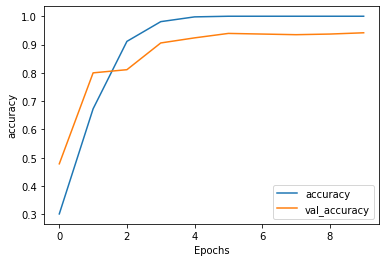

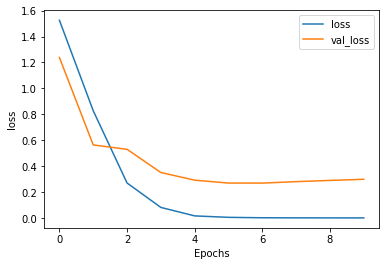

In [187]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [188]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred

array([[4.0205496e-06, 9.9990594e-01, 1.7323249e-06, 3.6601607e-05,
        2.7605424e-07, 5.1412459e-05]], dtype=float32)

In [195]:
txt = ["halo 2 heralds traffic explosion the growing popularity of online gaming could spell problems for net service firms  warns network monitoring company sandvine.  it issued the warning following analysis which shows that traffic on the xbox game network increased fourfold on the launch day of halo 2. the 9 november traffic explosion has continued into december  said sandvine. service providers now need to make sure that their networks can cope with the increasing demands for bandwidth. as well as being a popular single-player title  halo 2 can be connected to microsoft s subscription-based broadband network  xbox live. gamers who want to play online can create their own clan  or team  and take on others to see how well they compare.  but the surge in numbers and huge demands for bandwidth should be a wake-up call to the industry which must ensure that their networks can cope with the increases in traffic  said sandvine s chief technology officer marc morin.  in a bid to cope and ease congestion  providers are increasingly making their networks intelligent  finding out who is using bandwidth and for what. it could become common to charge people for the amount of bandwidth they use.  the explosion in xbox live traffic attributed to halo 2 should be seen as a clarion call   he said.  isps need to enhance the broadband experience for these high-end users by prioritising or reserving bandwidth for games   he added.  one of the main factors that spoils online gaming is  lag  in which there is a noticeable delay between a gamer clicking on a mouse or keyboard and what happens in the online gaming world. gamers tend to migrate toward networks with the lowest  lag . analysing traffic will become increasingly important for service providers if they are to hold on to bandwidth-hungry gamers said lindsay schroth  an analyst with research firm the yankee group.  in the competitive broadband environment  operators need to differentiate the way they offer access to services like live-play gaming   she said. in countries such as korea  which has high levels of fast net connections to homes  online gaming is hugely popular."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']
print(pred, labels[np.argmax(pred)])

[[1.1041892e-07 4.3351346e-07 3.5821172e-04 3.9263038e-04 9.9922347e-01
  2.5075604e-05]] entertainment


In [44]:
np.argmax(pred)

5